**my API key: LmzYIi8GLN5xewJahVN9cOemHa5nGLSA**

In [2]:
import requests
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?q=israel-hamas-gaza&api-key=LmzYIi8GLN5xewJahVN9cOemHa5nGLSA"
response = requests.get(url)
response

<Response [200]>

In [3]:
nyt_coverage = response.json()
nyt_coverage

{'status': 'OK',
 'copyright': 'Copyright (c) 2024 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'abstract': 'Hamas’s weakened position could leave the territory without any governing institutions.',
    'web_url': 'https://www.nytimes.com/2024/12/01/world/middleeast/a-power-vacuum-in-gaza-could-empower-warlords-and-gangs.html',
    'snippet': 'Hamas’s weakened position could leave the territory without any governing institutions.',
    'lead_paragraph': 'Since the Oct. 7, 2023, attacks by Hamas, the war in Gaza has been dogged by a persistent question: What happens after the conflict ends?',
    'print_section': 'A',
    'print_page': '6',
    'source': 'The New York Times',
    'multimedia': [{'rank': 0,
      'subtype': 'xlarge',
      'caption': None,
      'credit': None,
      'type': 'image',
      'url': 'images/2024/12/01/multimedia/01Interpreter-Gaza-mqtc/01Interpreter-Gaza-mqtc-articleLarge.jpg',
      'height': 400,
      'width': 600,
      'le

In [4]:
nyt_coverage.keys()

dict_keys(['status', 'copyright', 'response'])

In [5]:
nyt_coverage['response']['docs']

[{'abstract': 'Hamas’s weakened position could leave the territory without any governing institutions.',
  'web_url': 'https://www.nytimes.com/2024/12/01/world/middleeast/a-power-vacuum-in-gaza-could-empower-warlords-and-gangs.html',
  'snippet': 'Hamas’s weakened position could leave the territory without any governing institutions.',
  'lead_paragraph': 'Since the Oct. 7, 2023, attacks by Hamas, the war in Gaza has been dogged by a persistent question: What happens after the conflict ends?',
  'print_section': 'A',
  'print_page': '6',
  'source': 'The New York Times',
  'multimedia': [{'rank': 0,
    'subtype': 'xlarge',
    'caption': None,
    'credit': None,
    'type': 'image',
    'url': 'images/2024/12/01/multimedia/01Interpreter-Gaza-mqtc/01Interpreter-Gaza-mqtc-articleLarge.jpg',
    'height': 400,
    'width': 600,
    'legacy': {'xlarge': 'images/2024/12/01/multimedia/01Interpreter-Gaza-mqtc/01Interpreter-Gaza-mqtc-articleLarge.jpg',
     'xlargewidth': 600,
     'xlargehe

In [6]:
first_article = nyt_coverage['response']['docs'][0]
first_article.keys()

dict_keys(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'subsection_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri'])

In [7]:
for article in nyt_coverage['response']['docs']:
    title = article['headline']['main']
    link = article['web_url']
    pub_date = article['pub_date']
    print("Title:", title)
    print("Link:", link)
    print("Published on:", pub_date)


Title: A Power Vacuum in Gaza Could Empower Warlords and Gangs
Link: https://www.nytimes.com/2024/12/01/world/middleeast/a-power-vacuum-in-gaza-could-empower-warlords-and-gangs.html
Published on: 2024-12-01T10:02:03+0000
Title: Hamas Faces a Future Without Its Most Important Ally
Link: https://www.nytimes.com/2024/11/28/us/politics/hamas-hezbollah-israel.html
Published on: 2024-11-28T10:00:39+0000
Title: Israel’s Military Says Hostages Were Likely Killed by Hamas as Airstrike Hit
Link: https://www.nytimes.com/2024/12/04/world/middleeast/israel-gaza-hamas-hostages.html
Published on: 2024-12-04T18:48:38+0000
Title: Israel Builds Bases in Central Gaza, a Sign It May Be There to Stay
Link: https://www.nytimes.com/2024/12/02/world/middleeast/israel-gaza-bases-netzarim.html
Published on: 2024-12-02T10:00:52+0000
Title: American Thought to Be Alive in Gaza Was Killed on Oct. 7, Israel Says
Link: https://www.nytimes.com/2024/12/02/world/middleeast/omer-neutra-israel-oct-7-gaza-hamas-hostage.ht

In [85]:
import time
import requests

base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?q=israel-hamas-gaza&api-key=LmzYIi8GLN5xewJahVN9cOemHa5nGLSA"
all_content = []

for page in range(100):  
    url = base_url + f"&page={page}"
    print("Fetching URL:", url)
    response = requests.get(url)  
    
    if response.status_code == 200:
        data = response.json()
        articles = data.get("response", {}).get("docs", [])
        page_content = []    
        
        for article in articles:
            pub_date = article.get("pub_date", "")
            if pub_date.startswith("2023") or pub_date.startswith("2024"):
                title = article.get("headline", {}).get("main", "No title")
                link = article.get("web_url", "No URL")
                
                snippet = article.get("snippet", "")
                lead_paragraph = article.get("lead_paragraph", "")
                abstract = article.get("abstract", "")
                
                all_text = f"{title}. {snippet} {lead_paragraph} {abstract}"
                
                all_content.append({
                    "title": title,
                    "link": link,
                    "pub_date": pub_date,
                    "text": all_text
                })
                
                print("Title:", title)
                print("Text:", all_text)  
                print("Published on:", pub_date)
        
        print("Page:", {page + 1}, "Content pieces:")
        for content in page_content:
            print(content["title"])  
        
        print("Page:", {page + 1}, "Retrieved", {len(page_content)}, "articles.")
    else:
        print("Error fetching page:", {page + 1}, {response.status_code})
        break
    
    print("Waiting 15 seconds before fetching the next URL...")
    time.sleep(15)  

print("Total articles fetched:", len(all_content))

import pandas as pd
df = pd.DataFrame(all_content)
df.to_csv('nyt_articles_with_text.csv', index=False)
print("Saved to CSV file")

Fetching URL: https://api.nytimes.com/svc/search/v2/articlesearch.json?q=israel-hamas-gaza&api-key=LmzYIi8GLN5xewJahVN9cOemHa5nGLSA&page=0
Title: A Power Vacuum in Gaza Could Empower Warlords and Gangs
Text: A Power Vacuum in Gaza Could Empower Warlords and Gangs. Hamas’s weakened position could leave the territory without any governing institutions. Since the Oct. 7, 2023, attacks by Hamas, the war in Gaza has been dogged by a persistent question: What happens after the conflict ends? Hamas’s weakened position could leave the territory without any governing institutions.
Published on: 2024-12-01T10:02:03+0000
Title: Deadly Israeli Strike Hits Gaza Humanitarian Zone
Text: Deadly Israeli Strike Hits Gaza Humanitarian Zone. The Israeli military said it was targeting senior Hamas militants in the area. Video from the scene showed the charred remains of tents. The Israeli military bombed a densely populated tent encampment on Wednesday night in an area of southern Gaza that it had designat

In [86]:
df

,title,link,pub_date,text
0,A Power Vacuum in Gaza Could Empower Warlords ...,https://www.nytimes.com/2024/12/01/world/middl...,2024-12-01T10:02:03+0000,A Power Vacuum in Gaza Could Empower Warlords ...
1,Deadly Israeli Strike Hits Gaza Humanitarian Zone,https://www.nytimes.com/2024/12/05/world/middl...,2024-12-05T12:30:40+0000,Deadly Israeli Strike Hits Gaza Humanitarian Z...
2,Israel’s Military Says Hostages Were Likely Ki...,https://www.nytimes.com/2024/12/04/world/middl...,2024-12-04T18:48:38+0000,Israel’s Military Says Hostages Were Likely Ki...
3,Hamas Faces a Future Without Its Most Importan...,https://www.nytimes.com/2024/11/28/us/politics...,2024-11-28T10:00:39+0000,Hamas Faces a Future Without Its Most Importan...
4,"Israel Builds Bases in Central Gaza, a Sign It...",https://www.nytimes.com/2024/12/02/world/middl...,2024-12-02T10:00:52+0000,"Israel Builds Bases in Central Gaza, a Sign It..."
...,...,...,...,...
697,How the Israel-Hamas War Has Roiled TikTok Int...,https://www.nytimes.com/2024/03/28/business/ti...,2024-03-28T19:32:22+0000,How the Israel-Hamas War Has Roiled TikTok Int...
698,"Israel, Hamas Agree to Begin Cease-Fire Friday...",https://www.nytimes.com/2023/11/23/world/europ...,2023-11-24T00:01:20+0000,"Israel, Hamas Agree to Begin Cease-Fire Friday..."
699,The Secrets Hamas Knew About Israel’s Military,https://www.nytimes.com/2023/10/13/world/middl...,2023-10-13T20:18:24+0000,The Secrets Hamas Knew About Israel’s Military...
700,The Israel-Hamas War Will Reshape Western Poli...,https://www.nytimes.com/2023/11/01/opinion/isr...,2023-11-01T09:03:09+0000,The Israel-Hamas War Will Reshape Western Poli...


In [93]:
israeli_deaths = []
palestinian_deaths = []

for text in df["text"]:
    text = str(text).lower()
    sentences = text.split('.')  
    
    for sentence in sentences:
        if ("israeli" in sentence or "israel" in sentence) and not ("palestinian" in sentence or "gaza" in sentence):
            if any(word in sentence for word in ["killed", "dead", "died", "death", "casualties"]):
                israeli_deaths.append(sentence.strip())
        
        if ("palestinian" in sentence or "gaza" in sentence) and not ("israeli" in sentence or "israel" in sentence):
            if any(word in sentence for word in ["killed", "dead", "died", "death", "casualties"]):
                palestinian_deaths.append(sentence.strip())

print("\nIsraeli Death Descriptions (separate contexts):")
for desc in israeli_deaths:
    print(f"- {desc}")

print("\nPalestinian Death Descriptions (separate contexts):")
for desc in palestinian_deaths:
    print(f"- {desc}")


Israeli Death Descriptions (separate contexts):
- israel’s military says hostages were likely killed by hamas as airstrike hit
- the israeli security cabinet on tuesday night approved a deal for a cease-fire with hezbollah in lebanon, signaling that more than a year of conflict will soon be suspended, and raising hopes around the region that lebanon’s deadliest war in decades could be over
- for more than a year, the israeli government has avoided holding itself to account for its failure to prevent the deadliest event in israel’s history: the hamas-led raid on oct
- a cease-fire meant to end the deadliest war in decades between israel and the lebanese militant group hezbollah officially took effect early wednesday, less than a day after president biden announced the deal and israel approved its terms
- the cease-fire between israel and hezbollah began on wednesday, but much hardship and uncertainty lie ahead after a yearlong war that killed thousands and left widespread destruction i

Death Reporting Pattern Analysis:
Specific Numbers :
Israeli mentions: 35
Palestinian mentions: 3
Percentage split: 92.10526315789474 % Israeli and 7.894736842105263 % Palestinian
Attribution Phrases :
Israeli mentions: 9
Palestinian mentions: 0
Percentage split: 100.0 % Israeli and 0.0 % Palestinian
Passive Voice :
Israeli mentions: 14
Palestinian mentions: 2
Percentage split: 87.5 % Israeli and 12.5 % Palestinian
Civilian Categories :
Israeli mentions: 9
Palestinian mentions: 0
Percentage split: 100.0 % Israeli and 0.0 % Palestinian
Deadliest Mentions :
Israeli mentions: 7
Palestinian mentions: 2
Percentage split: 77.77777777777779 % Israeli and 22.22222222222222 % Palestinian


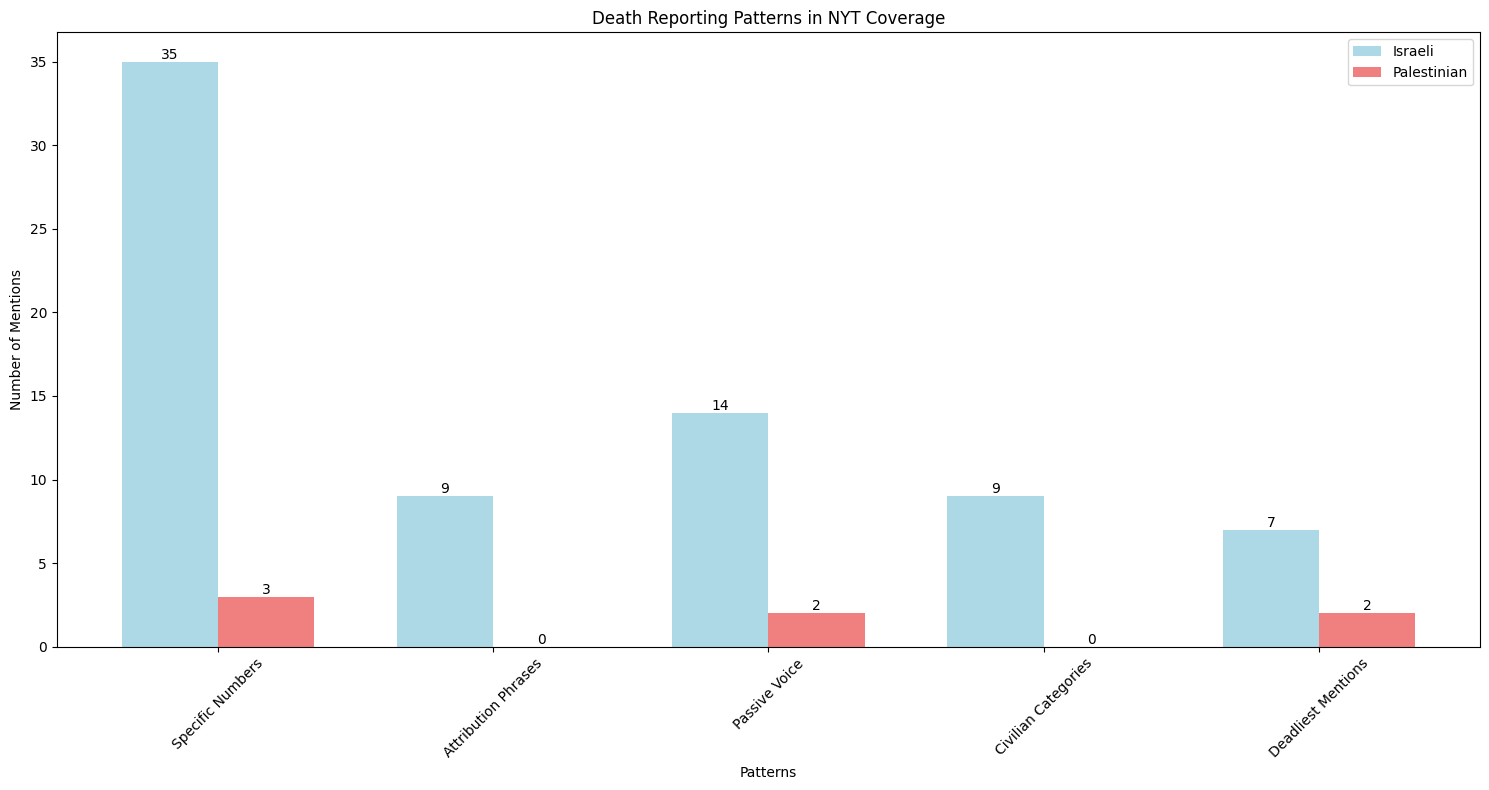

In [133]:
death_patterns = {
    'specific_numbers': {'israeli': 0, 'palestinian': 0},
    'attribution_phrases': {'israeli': 0, 'palestinian': 0},
    'passive_voice': {'israeli': 0, 'palestinian': 0},
    'civilian_categories': {'israeli': 0, 'palestinian': 0},
    'deadliest_mentions': {'israeli': 0, 'palestinian': 0}
}

def analyze_death_patterns(text, group):
    text = str(text).lower()
    
    if any(str(num) in text for num in range(1, 100000)):
        death_patterns['specific_numbers'][group] += 1
    
    attribution_words = ['according to', 'officials say', 'reported', 'claimed']
    if any(phrase in text for phrase in attribution_words):
        death_patterns['attribution_phrases'][group] += 1
    
    passive_indicators = ['were killed', 'was killed', 'been killed']
    if any(phrase in text for phrase in passive_indicators):
        death_patterns['passive_voice'][group] += 1
    
    civilian_words = ['women', 'children', 'civilian', 'family', 'residents']
    if any(word in text for word in civilian_words):
        death_patterns['civilian_categories'][group] += 1
    
    if 'deadliest' in text:
        death_patterns['deadliest_mentions'][group] += 1

df = pd.read_csv('nyt_articles_with_text.csv')

for text in df['text']:
    text = str(text).lower()
    
    if ('israeli' in text or 'israel' in text) and any(word in text for word in ['killed', 'dead', 'died', 'death']):
        if not ('palestinian' in text or 'gaza' in text):  
            analyze_death_patterns(text, 'israeli')

    if ('palestinian' in text or 'gaza' in text) and any(word in text for word in ['killed', 'dead', 'died', 'death']):
        if not ('israeli' in text or 'israel' in text):  
            analyze_death_patterns(text, 'palestinian')


print("Death Reporting Pattern Analysis:")
for pattern, counts in death_patterns.items():
    print(pattern.replace('_', ' ').title(),":")
    print("Israeli mentions:", counts['israeli'])
    print("Palestinian mentions:", counts['palestinian'])
    if counts['israeli'] + counts['palestinian'] > 0:
        israeli_percent = (counts['israeli'] / (counts['israeli'] + counts['palestinian'])) * 100
        palestinian_percent = (counts['palestinian'] / (counts['israeli'] + counts['palestinian'])) * 100
        print("Percentage split:", israeli_percent,"% Israeli", "and", palestinian_percent, "% Palestinian")


patterns = list(death_patterns.keys())
israeli_counts = [death_patterns[p]['israeli'] for p in patterns]
palestinian_counts = [death_patterns[p]['palestinian'] for p in patterns]

# Set up the plot
plt.figure(figsize=(15, 8))

# Set position of bars
x = np.arange(len(patterns))
width = 0.35

# Create bars
plt.bar(x - width/2, israeli_counts, width, label='Israeli', color='lightblue')
plt.bar(x + width/2, palestinian_counts, width, label='Palestinian', color='lightcoral')

# Customize the plot
plt.title('Death Reporting Patterns in NYT Coverage')
plt.xlabel('Patterns')
plt.ylabel('Number of Mentions')
plt.xticks(x, [p.replace('_', ' ').title() for p in patterns], rotation=45)
plt.legend()

# Add value labels on bars
for i in range(len(patterns)):
    plt.text(i - width/2, israeli_counts[i], str(israeli_counts[i]), 
             ha='center', va='bottom')
    plt.text(i + width/2, palestinian_counts[i], str(palestinian_counts[i]), 
             ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

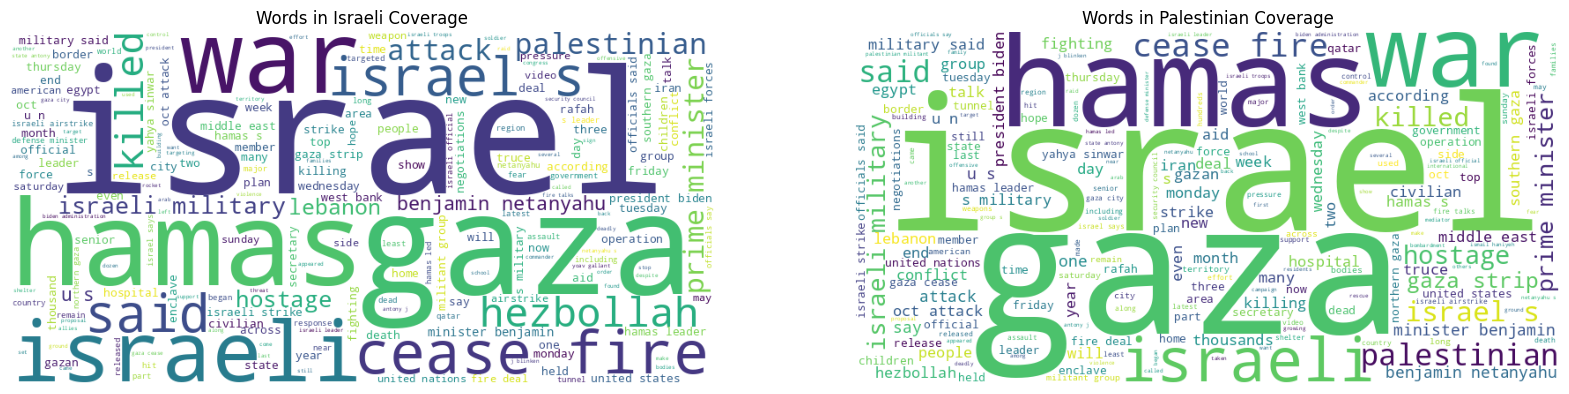

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create text collections
israeli_text = ""
palestinian_text = ""

# Collect texts
for text in df['text']:
    text = str(text).lower()
    if 'israeli' in text or 'israel' in text:
        israeli_text += " " + text
    if 'palestinian' in text or 'gaza' in text:
        palestinian_text += " " + text

# Create and generate word clouds
wordcloud_israeli = WordCloud(width=800, height=400, background_color='white').generate(israeli_text)
wordcloud_palestinian = WordCloud(width=800, height=400, background_color='white').generate(palestinian_text)

# Display the word clouds
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(wordcloud_israeli)
plt.title('Words in Israeli Coverage')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_palestinian)
plt.title('Words in Palestinian Coverage')
plt.axis('off')

plt.show()


Death Reporting Analysis:

Precise Numbers Used:
Israeli deaths: 79
Palestinian deaths: 28

Vague Terms Used:
Israeli deaths: 36
Palestinian deaths: 22

Total Israeli mentions: 115
Total Palestinian mentions: 50


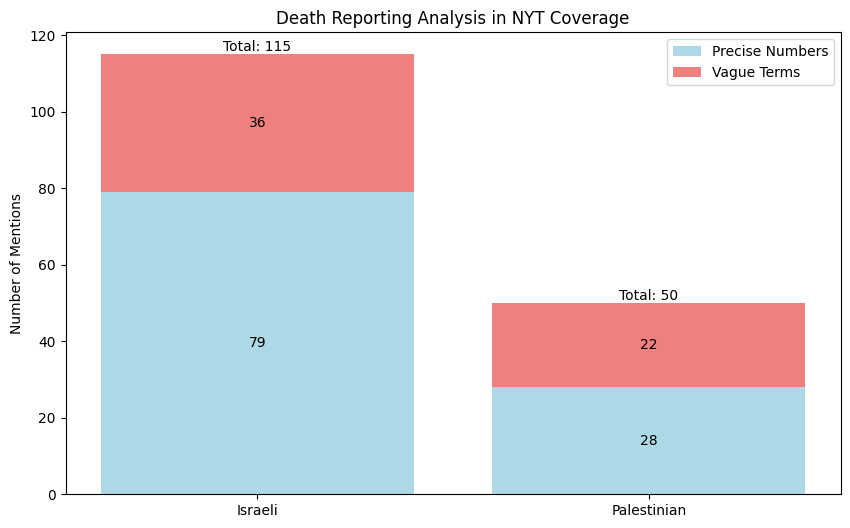

In [132]:
death_mentions = {
    'precise_numbers': {'israeli': 0, 'palestinian': 0},
    'vague_terms': {'israeli': 0, 'palestinian': 0}
}

vague_terms = ['dozens', 'scores', 'many', 'numerous']
death_words = ['killed', 'dead', 'casualties', 'died']

for text in df['text']:
    text = str(text).lower()
    
    if 'israeli' in text and any(word in text for word in death_words):
        if any(str(num) in text for num in range(100000)):
            death_mentions['precise_numbers']['israeli'] += 1
        if any(term in text for term in vague_terms):
            death_mentions['vague_terms']['israeli'] += 1
            
    if 'palestinian' in text and any(word in text for word in death_words):
        if any(str(num) in text for num in range(100000)):
            death_mentions['precise_numbers']['palestinian'] += 1
        if any(term in text for term in vague_terms):
            death_mentions['vague_terms']['palestinian'] += 1

# Print results
print("\nDeath Reporting Analysis:")
print("\nPrecise Numbers Used:")
print(f"Israeli deaths: {death_mentions['precise_numbers']['israeli']}")
print(f"Palestinian deaths: {death_mentions['precise_numbers']['palestinian']}")

print("\nVague Terms Used:")
print(f"Israeli deaths: {death_mentions['vague_terms']['israeli']}")
print(f"Palestinian deaths: {death_mentions['vague_terms']['palestinian']}")

# Calculate totals and percentages
total_israeli = death_mentions['precise_numbers']['israeli'] + death_mentions['vague_terms']['israeli']
total_palestinian = death_mentions['precise_numbers']['palestinian'] + death_mentions['vague_terms']['palestinian']

print(f"\nTotal Israeli mentions: {total_israeli}")
print(f"Total Palestinian mentions: {total_palestinian}")

# Create plot
groups = ['Israeli', 'Palestinian']
precise = [death_mentions['precise_numbers']['israeli'], death_mentions['precise_numbers']['palestinian']]
vague = [death_mentions['vague_terms']['israeli'], death_mentions['vague_terms']['palestinian']]

plt.figure(figsize=(10, 6))
bar1 = plt.bar(groups, precise, label='Precise Numbers', color='lightblue')
bar2 = plt.bar(groups, vague, bottom=precise, label='Vague Terms', color='lightcoral')

# Add value labels on bars
for i in range(len(groups)):
    # Label for precise numbers
    plt.text(i, precise[i]/2, str(precise[i]), ha='center', va='center')
    # Label for vague terms
    plt.text(i, precise[i] + vague[i]/2, str(vague[i]), ha='center', va='center')
    # Total at the top
    plt.text(i, precise[i] + vague[i], f'Total: {precise[i] + vague[i]}', 
             ha='center', va='bottom')

plt.title('Death Reporting Analysis in NYT Coverage')
plt.ylabel('Number of Mentions')
plt.legend()

plt.show()